## Project:🌾 Agricultural Crops Image Classification

## 🧑‍🌾 Project Overview:

This project aims to build a Deep Learning model that can automatically classify images of different agricultural crops based on their visual features.
The dataset consists of multiple crop categories such as Cherry, Corn, Rice, Cotton, Sugarcane, and Wheat, each containing several real-world images.

The model’s goal is to assist in smart agricultural practices — helping farmers, agronomists, or automated systems identify crop types efficiently using computer vision.
By leveraging Convolutional Neural Networks (CNNs), the system learns to recognize crop patterns, textures, and shapes, making it capable of robust classification across diverse field conditions.

## ⚙️ Project Workflow

1. Data Collection & Organization

     - The dataset was sourced from:
       ***/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/***
    - Images were originally grouped under their respective crop folders.

2. Train–Validation–Test Split

   - The dataset was split into:

        - 70% Train
        - 15% Validation
        - 15% Test

    - Each split maintains balanced class representation.

3. Data Loading

    - Used ImageDataGenerator from Keras to efficiently load and preprocess images in batches for training and validation.

4. Preprocessing Steps

     - Resizing: Standardized image dimensions for consistent input.
    
     - Normalization: Scaled pixel values between 0 and 1 to improve training stability.

5. Data Augmentation (if applied)

    - Techniques such as rotation, flipping, and zooming were applied to increase dataset diversity and reduce overfitting.

6. Model Building

    - Developed a CNN-based architecture (optionally combined with dense layers for classification).
    
    - Model designed to learn crop-specific image patterns effectively.

7. Model Training

    - Trained using the training set and validated on the validation set.
    
    - Performance metrics such as accuracy and loss were monitored.

8. Model Evaluation

    - Tested the final model on the unseen test set to measure real-world performance.

9. Predictions

    - Conducted both batch and real-time predictions on new crop images to validate model usability.

#### Importing the Base Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

In [2]:
import os     # folders & files operations
# Selecting Kaggle Input Folder for Images
os.chdir('/kaggle/input/agricultural-crops-image-classification/')

In [3]:
# Checking the folders in folder
os.listdir('Agricultural-crops')

['tomato',
 'chilli',
 'clove',
 'pineapple',
 'vigna-radiati(Mung)',
 'Olive-tree',
 'coconut',
 'papaya',
 'Tobacco-plant',
 'jute',
 'jowar',
 'gram',
 'tea',
 'maize',
 'wheat',
 'soyabean',
 'Pearl_millet(bajra)',
 'Lemon',
 'Fox_nut(Makhana)',
 'mustard-oil',
 'sugarcane',
 'almond',
 'Cucumber',
 'sunflower',
 'cotton',
 'banana',
 'Cherry',
 'cardamom',
 'rice',
 'Coffee-plant']

**Categerizing the dataset to train,valid and test**

In [4]:
import os
import shutil
import random

# Set paths
source_dir = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'
base_dir = '/kaggle/working/dataset'

# Create main folders for splits
for split in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(base_dir, split), exist_ok=True)

# Split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Loop through each category (like rice, wheat, maize, etc.)
for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)
    if not os.path.isdir(category_path):
        continue  # Skip if it's not a folder

    # Get all image files inside category
    images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img))]
    random.shuffle(images)

    # Split sizes
    total = len(images)
    train_end = int(train_ratio * total)
    valid_end = int((train_ratio + valid_ratio) * total)

    train_imgs = images[:train_end]
    val_imgs = images[train_end:valid_end]
    test_imgs = images[valid_end:]

    # Create subfolders for each category
    for split in ['train', 'valid', 'test']:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

    # Helper function to copy files
    def copy_images(image_list, split_name):
        for img in image_list:
            src = os.path.join(category_path, img)
            dest = os.path.join(base_dir, split_name, category, img)
            shutil.copy2(src, dest)

    # Copy images
    copy_images(train_imgs, 'train')
    copy_images(val_imgs, 'valid')
    copy_images(test_imgs, 'test')

print("✅ Dataset split completed successfully!")


✅ Dataset split completed successfully!


In [5]:
os.chdir('/kaggle/working/dataset')

In [6]:
os.listdir('test')

['tomato',
 'chilli',
 'tea',
 'Lemon',
 'coconut',
 'Cucumber',
 'maize',
 'gram',
 'sugarcane',
 'jowar',
 'mustard-oil',
 'papaya',
 'Pearl_millet(bajra)',
 'almond',
 'Fox_nut(Makhana)',
 'Olive-tree',
 'pineapple',
 'rice',
 'sunflower',
 'vigna-radiati(Mung)',
 'banana',
 'clove',
 'Cherry',
 'cardamom',
 'soyabean',
 'wheat',
 'Tobacco-plant',
 'jute',
 'cotton',
 'Coffee-plant']

**Checking number of images in folders**

In [7]:
for category in ['train','valid','test']:
    print("Folder:",category.title())
    clasess=os.listdir('train')
    for cls in clasess:
        print(f"{cls}:",len(os.listdir(category+"/"+cls)))
    print()

Folder: Train
tomato: 18
chilli: 16
tea: 16
Lemon: 19
coconut: 17
Cucumber: 21
maize: 21
gram: 17
sugarcane: 17
jowar: 21
mustard-oil: 19
papaya: 16
Pearl_millet(bajra): 27
almond: 14
Fox_nut(Makhana): 16
Olive-tree: 21
pineapple: 17
rice: 20
sunflower: 16
vigna-radiati(Mung): 18
banana: 21
clove: 21
Cherry: 22
cardamom: 15
soyabean: 21
wheat: 21
Tobacco-plant: 23
jute: 16
cotton: 22
Coffee-plant: 20

Folder: Valid
tomato: 4
chilli: 3
tea: 3
Lemon: 4
coconut: 4
Cucumber: 5
maize: 5
gram: 4
sugarcane: 4
jowar: 4
mustard-oil: 4
papaya: 3
Pearl_millet(bajra): 6
almond: 3
Fox_nut(Makhana): 3
Olive-tree: 4
pineapple: 4
rice: 4
sunflower: 4
vigna-radiati(Mung): 4
banana: 5
clove: 4
Cherry: 5
cardamom: 3
soyabean: 4
wheat: 5
Tobacco-plant: 5
jute: 3
cotton: 5
Coffee-plant: 4

Folder: Test
tomato: 4
chilli: 4
tea: 4
Lemon: 5
coconut: 4
Cucumber: 5
maize: 5
gram: 4
sugarcane: 4
jowar: 5
mustard-oil: 5
papaya: 4
Pearl_millet(bajra): 6
almond: 4
Fox_nut(Makhana): 4
Olive-tree: 5
pineapple: 4
rice

**Loading Train Data & Displaying Sample**

Categeroy : tomato
First Image


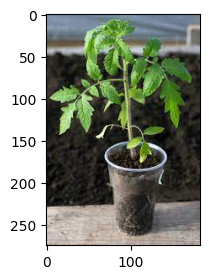

Categeroy : chilli
First Image


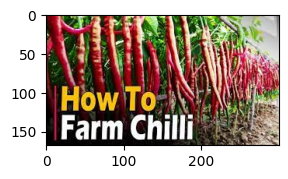

Categeroy : tea
First Image


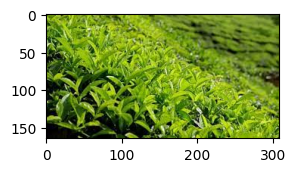

Categeroy : Lemon
First Image


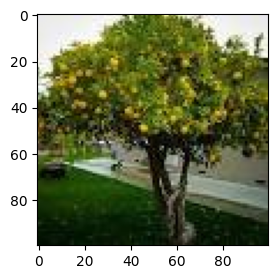

Categeroy : coconut
First Image


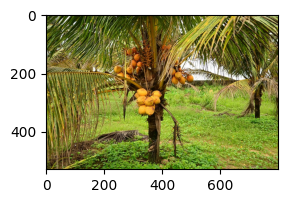

Categeroy : Cucumber
First Image


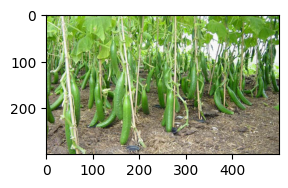

Categeroy : maize
First Image


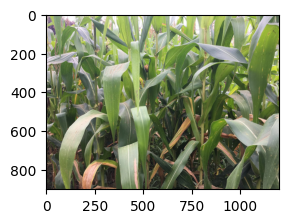

Categeroy : gram
First Image


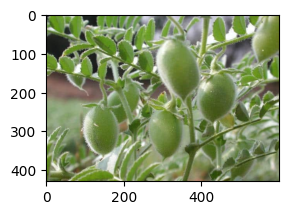

Categeroy : sugarcane
First Image


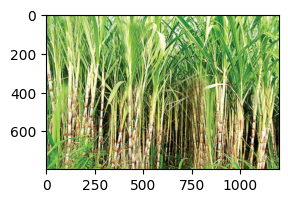

Categeroy : jowar
First Image


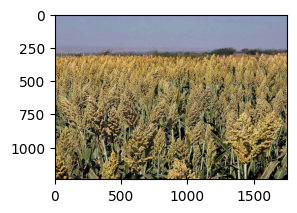

Categeroy : mustard-oil
First Image


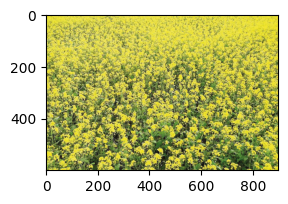

Categeroy : papaya
First Image


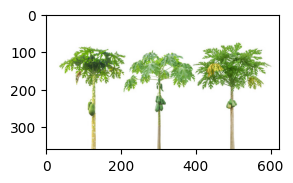

Categeroy : Pearl_millet(bajra)
First Image


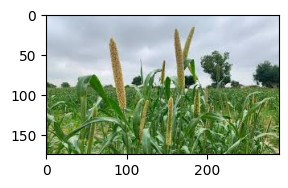

Categeroy : almond
First Image


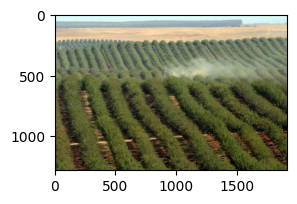

Categeroy : Fox_nut(Makhana)
First Image


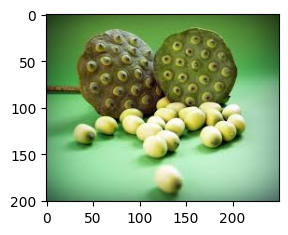

Categeroy : Olive-tree
First Image


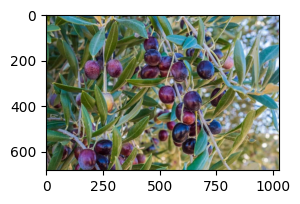

Categeroy : pineapple
First Image


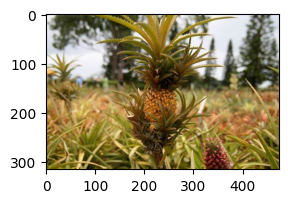

Categeroy : rice
First Image


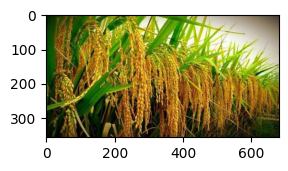

Categeroy : sunflower
First Image


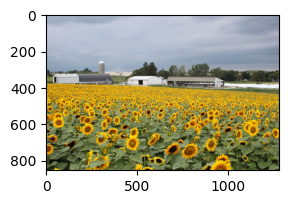

Categeroy : vigna-radiati(Mung)
First Image


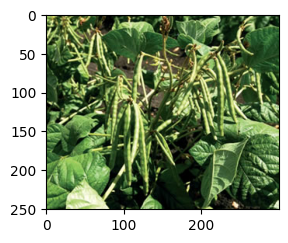

Categeroy : banana
First Image


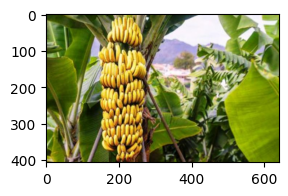

Categeroy : clove
First Image


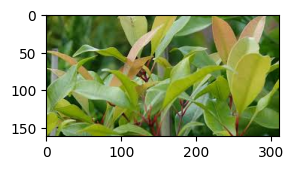

Categeroy : Cherry
First Image


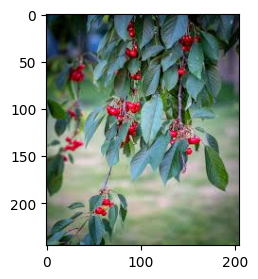

Categeroy : cardamom
First Image


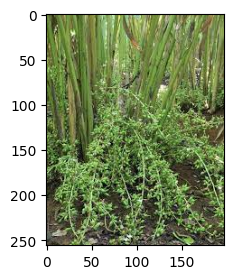

Categeroy : soyabean
First Image


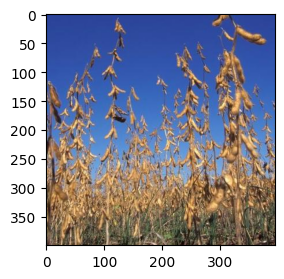

Categeroy : wheat
First Image


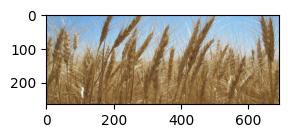

Categeroy : Tobacco-plant
First Image


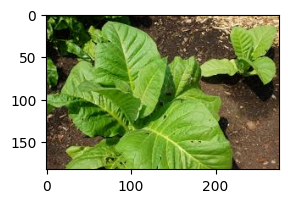

Categeroy : jute
First Image


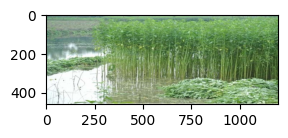

Categeroy : cotton
First Image


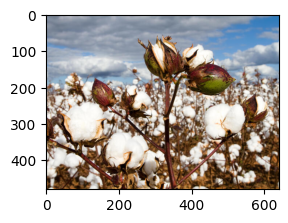

Categeroy : Coffee-plant
First Image


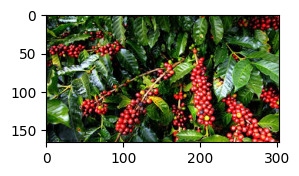

In [8]:
for cat in os.listdir('train'):
    print("Categeroy :",cat)
    print("First Image")
    imagename=os.listdir(f"train/{cat}")[0]
    img=mpimage.imread(os.path.join('train',cat,imagename))
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()

**1. Data Loading - Image Data Generator**

In [9]:
# Module
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-11-06 12:31:59.265175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762432319.552258      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762432319.631072      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Taking Train & Validation Images**

In [10]:
# Defining generators with Data Augmentation : Because We have Small Size Data

train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixels to [0,1]
    # Image Data Augmentation Params
    rotation_range=15,     # random rotations
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,  # mirror images
    fill_mode='nearest',   # fill empty pixels after transforms
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Create iterators from directory
train = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),   # resize all images
    batch_size=32,            # Number of Images for Batch to Train
    class_mode='categorical', # or 'binary' for 2 classes
    shuffle=True,
    seed=42
)

val = val_datagen.flow_from_directory(
    'valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 569 images belonging to 30 classes.
Found 122 images belonging to 30 classes.


Images as X & Folder/Class Names as y

**Sample X & y View from Train Gen**

In [12]:
X_batch, y_batch = next(train)   # or: X_batch, y_batch = train_gen.next()
print(X_batch.shape, y_batch.shape) 

(32, 224, 224, 3) (32, 30)


In [13]:
X_batch[0]

array([[[0.47247213, 0.52360636, 0.18431373],
        [0.47276938, 0.5233091 , 0.18431373],
        [0.4730666 , 0.5230119 , 0.18431373],
        ...,
        [0.26906484, 0.7344306 , 0.83902687],
        [0.33685386, 0.76142097, 0.86352473],
        [0.48924688, 0.83041704, 0.90916574]],

       [[0.47450984, 0.52156866, 0.18431373],
        [0.47450984, 0.52156866, 0.18431373],
        [0.47450984, 0.52156866, 0.18431373],
        ...,
        [0.44845277, 0.8037722 , 0.90276873],
        [0.5201857 , 0.8405725 , 0.9454484 ],
        [0.59142584, 0.8599691 , 0.94513404]],

       [[0.4733004 , 0.5203592 , 0.18552317],
        [0.47300318, 0.52006197, 0.18582039],
        [0.47270593, 0.5197648 , 0.1861176 ],
        ...,
        [0.60978323, 0.87234676, 0.96547365],
        [0.64370674, 0.8800754 , 0.98817116],
        [0.64871675, 0.8633509 , 0.95199543]],

       ...,

       [[0.12325042, 0.13090755, 0.15425098],
        [0.1241421 , 0.13239369, 0.15633155],
        [0.12503377, 0

In [14]:
y_batch[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
train.class_indices

{'Cherry': 0,
 'Coffee-plant': 1,
 'Cucumber': 2,
 'Fox_nut(Makhana)': 3,
 'Lemon': 4,
 'Olive-tree': 5,
 'Pearl_millet(bajra)': 6,
 'Tobacco-plant': 7,
 'almond': 8,
 'banana': 9,
 'cardamom': 10,
 'chilli': 11,
 'clove': 12,
 'coconut': 13,
 'cotton': 14,
 'gram': 15,
 'jowar': 16,
 'jute': 17,
 'maize': 18,
 'mustard-oil': 19,
 'papaya': 20,
 'pineapple': 21,
 'rice': 22,
 'soyabean': 23,
 'sugarcane': 24,
 'sunflower': 25,
 'tea': 26,
 'tomato': 27,
 'vigna-radiati(Mung)': 28,
 'wheat': 29}

**2. Model Building**

* Building CNN (to Extract Image Features) +ANN (Classification) Architecture
    * Below are the layers for each Network
    * CNN
        * Convolution Layer
        * Pooling Layer
        * Flatten Layer
    * ANN @ Fully Connected Layer
        * Hidden Layers
        * Output Layer

* **Model Architecture Flow:**
    - Convolutional Layers followed by MaxPooling Layers.
    - The Flatten layer to flatten the output of the convolutional layer.
    - Then we will have fully connected layers followed by the output of the flattened layer.
    - The final layer is the output layer which has the activation function softmax, gives each class prob.
        
    Note: To handle Overfitting , we can given kernel regularizer parameter (l1 or l2) or dropout layers

In [16]:
from keras import Sequential
from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense

**Model Intialization**

In [17]:
model = Sequential(name="cropsImageClassification")

**2.1 CNN Layers**

**Convolution Layer + Activation**
* Convolution of image with different filters
    params: filters, kernel_size, stride size, input shape

    Note:
    * Padding is another param where we can send the original image size through the entire convolution , it will add an extra pixel to the input image

    * relu is used to deal with non-linearity in the convolution

In [18]:
model.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), input_shape=(224,224,3), name="Conv1"))
model.add(Activation('relu'))
model.summary()

2025-11-06 12:32:22.821260: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "cropsImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 111, 111, 32)   │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

* Output image size = (w-f+2p/s)+1

        here w(width) = 224, f(kernel_size) = 3, p(padding) = 0 (used to balance filter on image), s(stride) = 2

        applying above we will get 111*111*32

* weights/params = ((kernel_size x previous filters) x current filters) + bias (no of current filters)

            kernel_size = (3,3)
            previous filters = 3 (channels)
            current filters = 32
            bias = 32

    total - 896

**Pooling**

* Getting max pixel values from convolution feature maps

    params: pool_size, strides

In [19]:
model.add(MaxPool2D((2,2), strides=(2,2), name="Pool1"))

In [20]:
model.summary()

Model: "cropsImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 55, 55, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

* output image size = (w-f/s)+1

      here w(width) = 63, f(kernel_size) = 2, s(stride) = 2

      applying above we will get 31*31*32

* no weights & biases

**Adding Extra Convolution+Pooling Layer (Optional) - To control the Flatten Output**

In [21]:
model.add(Conv2D(filters=64, kernel_size=(2,2), strides=(2,2), name='Conv2'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool2'))

In [22]:
model.add(Conv2D(filters=64, kernel_size=(2,2), strides=(2,2), name='Conv3'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool3'))

In [23]:
model.summary()

Model: "cropsImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 27, 27, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 13, 13, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 12, 12, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,600 (100.00 KB)

 Trainable params: 25,600 (100.00 KB)

 Non-trainable params: 0 (0.00 B)

* **Flatten Layer**

In [24]:
model.add(Flatten(name='Flatten'))

In [25]:
model.summary()

Model: "cropsImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 27, 27, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 13, 13, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 9216)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,600 (100.00 KB)

 Trainable params: 25,600 (100.00 KB)

 Non-trainable params: 0 (0.00 B)

**2.2 ANN (Fully Connected Layer) with Output**
                                       (Input: Flatten)

In [26]:
# Following Dense Layer Thumb Rule: n/2 -> Flatten/2
model.add(Dense(kernel_initializer='random_uniform', activation='relu', units=4096, name='HiddenLayer1'))
model.add(Dense(kernel_initializer='random_uniform', activation='relu', units=2048, name='HiddenLayer2'))
model.add(Dense(kernel_initializer='random_uniform', activation='relu', units=1024, name='HiddenLayer3'))
model.add(Dense(kernel_initializer='random_uniform', activation='relu', units=512, name='HiddenLayer4'))

In [27]:
model.summary()

Model: "cropsImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 27, 27, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 13, 13, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer3 (Dense)            │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer4 (Dense)            │ (None, 512)            │       524,800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,792,064 (186.13 MB)

 Trainable params: 48,792,064 (186.13 MB)

 Non-trainable params: 0 (0.00 B)

**Output Layer**

In [28]:
# we have 30 classes in output , softmax will give each class probability

model.add(Dense(kernel_initializer='random_uniform', activation='softmax', units=30, name='OutputLayer'))
model.summary()

Model: "cropsImageClassification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 27, 27, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 13, 13, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer3 (Dense)            │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer4 (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,807,454 (186.19 MB)

 Trainable params: 48,807,454 (186.19 MB)

 Non-trainable params: 0 (0.00 B)

**2.3 Compile Params**

In [29]:
# Compile Params

model.compile(loss=['categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])

# We can also Try with different optimizers

**3. Model Training**

* We can use Call Backs [Model CheckPoints, EarlyStopping] if needed

In [30]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

ES = EarlyStopping(
    monitor='val_loss', # Same as the 
    patience=5, # Wait for 5 epochs before stopping the training
    verbose=1,
    restore_best_weights='True', # Restore model weights from the epoch with the best value of the monitored quantity.
    min_delta=0.1
)

MC = ModelCheckpoint(
    '/kaggle/working/cropsImageclassification.h5', # We can also provide full path to the folder to save model
    monitor='val_loss',  # Monitor other things like val_accuracy or accuracy 
    save_best_only='True', # Make sure to save only the best model
    verbose=1
)

In [31]:
# Taking fit method
# Takes time to run based on number of parameter training

import warnings
warnings.filterwarnings("ignore")

In [32]:

history = model.fit(train, validation_data=val, epochs=50, callbacks=[MC, ES])

# No need of ytrain/ytest , because image data generator takes class names from given images folder names
# Workers parameter will uses avaiable cores in cpu: workers=-1 means consider all cores available for faster execution

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0359 - loss: 3.5094
Epoch 1: val_loss improved from inf to 3.39529, saving model to /kaggle/working/cropsImageclassification.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0359 - loss: 3.5063 - val_accuracy: 0.0574 - val_loss: 3.3953
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0543 - loss: 3.3827
Epoch 2: val_loss improved from 3.39529 to 3.34429, saving model to /kaggle/working/cropsImageclassification.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0542 - loss: 3.3820 - val_accuracy: 0.0574 - val_loss: 3.3443
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0511 - loss: 3.3018
Epoch 3: val_loss improved from 3.34429 to 3.30784, saving model to /kaggle/working/cropsImageclassification.h5
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.0517 - loss: 3.3018 - val_accuracy: 0.0984 - val_loss: 3.3078
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0828 - loss

**Training Visualization**

In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Available metrics: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


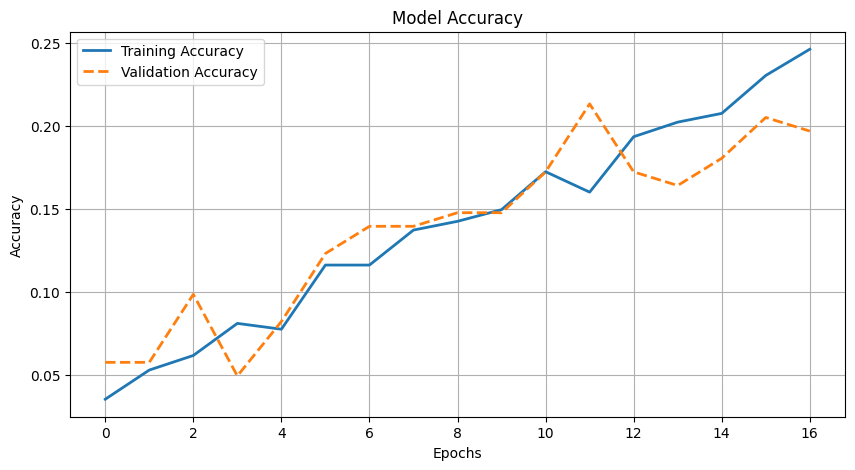

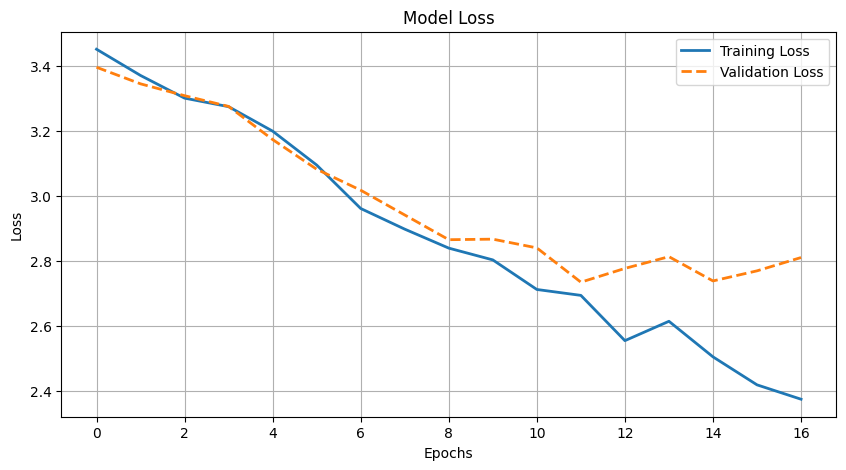

In [34]:
import matplotlib.pyplot as plt

# Extract training history
history = model.history.history

# Print available keys (to confirm metric names)
print("Available metrics:", history.keys())

# Determine correct metric key names
acc_key = 'accuracy' if 'accuracy' in history else 'acc'
val_acc_key = 'val_accuracy' if 'val_accuracy' in history else 'val_acc'

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history[acc_key], label='Training Accuracy', linewidth=2)
plt.plot(history[val_acc_key], label='Validation Accuracy', linestyle='--', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Training Loss', linewidth=2)
plt.plot(history['val_loss'], label='Validation Loss', linestyle='--', linewidth=2)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Notes:**
* We can tune model performance by
    - Hyp Param Tuning (conv+pool layers adding, filters, kernel sizes, strides, ANN Hidden Layers, etc..)
    - Dropout layers
    - Regularizations
    - Epochs, Batch Size Tuning

**4. Test Predictions**

Loading Test Images for Predictions

In [35]:
# Using Validation generator for Images Loading

test =  val_datagen.flow_from_directory(
    'test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predicitons on Loaded Images
predictions = model.predict(test) # Will generate probabilities of 30 classes for each image

Found 138 images belonging to 30 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step


In [36]:
classes = {v: k for k, v in train.class_indices.items()} # Taking Class Names for Indexes

import numpy as np

output = []
# Going thorugh each images probabilities and identifying max prob class
for prediction in predictions:
    # Mapping high probability class index number with class name
    cls = classes[np.argmax(prediction)]
    output.append(cls)

print(output)

['Cherry', 'Cherry', 'Cherry', 'Cherry', 'Cherry', 'Olive-tree', 'Cherry', 'Cherry', 'Cherry', 'Cherry', 'Cucumber', 'mustard-oil', 'Pearl_millet(bajra)', 'Cucumber', 'Cucumber', 'cotton', 'cotton', 'cotton', 'Cucumber', 'Lemon', 'cotton', 'rice', 'Lemon', 'Olive-tree', 'cotton', 'sugarcane', 'Olive-tree', 'cotton', 'Lemon', 'cotton', 'Cucumber', 'cotton', 'Pearl_millet(bajra)', 'Olive-tree', 'Pearl_millet(bajra)', 'Cucumber', 'Cucumber', 'cotton', 'rice', 'jowar', 'cotton', 'Tobacco-plant', 'cotton', 'cotton', 'Lemon', 'Lemon', 'Cucumber', 'pineapple', 'Cucumber', 'Cucumber', 'jowar', 'Lemon', 'Cherry', 'Cherry', 'Cherry', 'Cherry', 'soyabean', 'Cherry', 'Cherry', 'Olive-tree', 'Lemon', 'Olive-tree', 'Cucumber', 'Cherry', 'Cherry', 'Cucumber', 'tea', 'cotton', 'cotton', 'cotton', 'tea', 'cotton', 'cotton', 'Olive-tree', 'Olive-tree', 'tea', 'pineapple', 'jowar', 'Pearl_millet(bajra)', 'pineapple', 'tea', 'Cherry', 'Cucumber', 'tea', 'mustard-oil', 'Cucumber', 'tea', 'tea', 'tea', 'mus

**5. Real time Prediction**
   * **Prediction on given Images**

In [37]:
# Writing a Function for prediction of given image

import cv2
import numpy as np

def classify(frame):
    # Converting Image Size to Cnn Input Size
    img=cv2.resize(frame,(224,224))
    
    #scaling to 0 to 1 range
    if(np.max(img)>1):
        img = img/255.0
        
    img = np.array([img])
    prediction = model.predict(img)[0] # will predict 12 classes probabilities
    # Taking Class Names & Numbers for Prediction from train data generator
    classes = {v: k for k, v in train.class_indices.items()}
    # mapping high probability class index number with class name
    cls = classes[np.argmax(prediction)] 
    
    return cls # output class name

* **Taking Sample Images from Test Images given**

In [38]:
import glob

images = glob.glob("/kaggle/input/data-for-prediction/*")

* **Applying above detect function on Images**

Given Image:



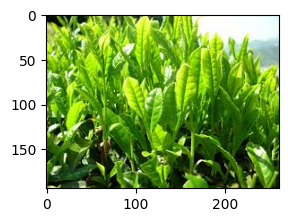


Original Class: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Prediction Class: Cucumber

Given Image:



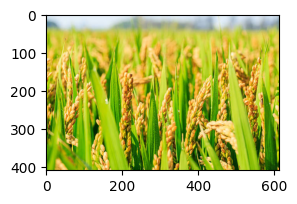


Original Class: rice
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction Class: Mustard-Oil

Given Image:



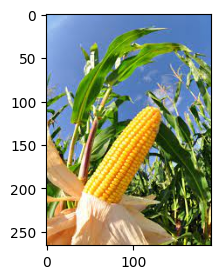


Original Class: Maize
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction Class: Lemon



In [39]:
import matplotlib.image as mpimg # to read image in array

# Looping through each image and applying classify function
for img in images:
    # Reading image
    image = mpimg.imread(r'{}'.format(img))
    print("Given Image:")
    print()
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.show()
    print()
    print("Original Class:",img.split("/")[-1].split(".")[0])
    out = classify(image) # prediction function
    print("Prediction Class:",out.title())
    print()
    print("=================================================================")

**6. Saving Model For Model Deployment**

**In the callbacks, Best Model with Best Validation Score will be stored in kaggle/working**

- Click on file to download , wait for some time to show download

#### To save without callbacks

model.save("/kaggle/working/SportsImageClassify.h5") # Keras trained model will have save method